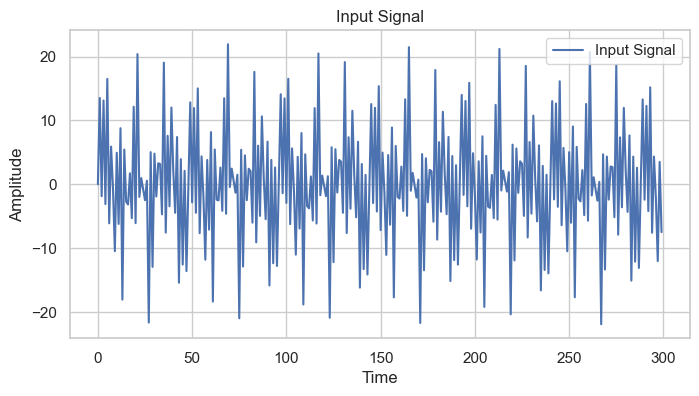

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

plot_graph(inputSignal[:300], title="Input Signal")

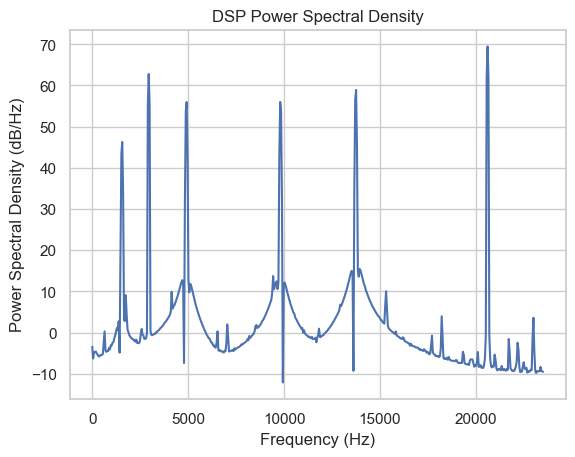

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load PSD data from the CSV file
data = np.loadtxt('psd.csv', delimiter=' ')

# Extract frequency and PSD values
frequency = data[:, 0]
psd_dB = data[:, 1]

# Plot the PSD in dB/Hz scale
plt.plot(frequency, psd_dB)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('DSP Power Spectral Density')
plt.grid(True)
plt.show()


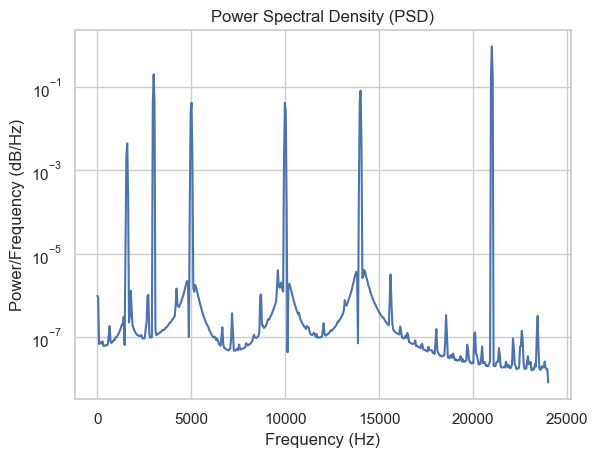

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

fs = 48000  # Sampling frequency
SIGNAL_LENGTH = 102400  # Length of input signal
FFT_LENGTH = 1024  # Length of FFT

# Calculate PSD using Welch's method
frequencies, psd = welch(inputSignal, fs=fs, nperseg=FFT_LENGTH, nfft=FFT_LENGTH, noverlap=FFT_LENGTH*0.5,window="hamming")

# Plot the PSD
plt.figure()
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()


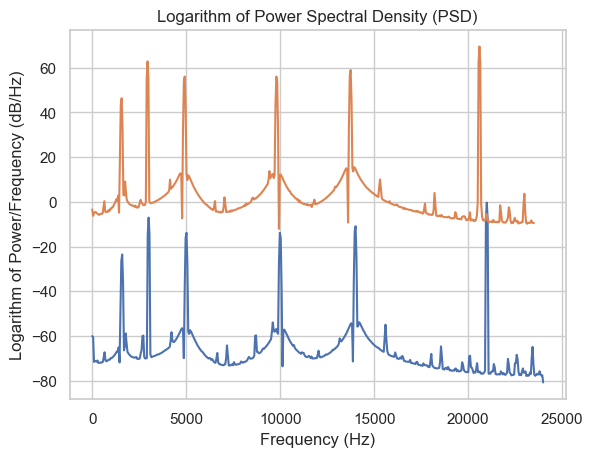

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

fs = 48000  # Sampling frequency
FFT_LENGTH = 1024  # Length of FFT

# Calculate PSD using Welch's method
frequencies, psd = welch(inputSignal, fs=fs, nperseg=FFT_LENGTH, nfft=FFT_LENGTH, noverlap=FFT_LENGTH*0.5, window="hamming")

# Take the logarithm of the PSD values
log_psd = 10*np.log10(psd)

# Plot the logarithm of PSD
plt.plot(frequencies, log_psd)
plt.plot(frequency, psd_dB)
plt.title('Logarithm of Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Logarithm of Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

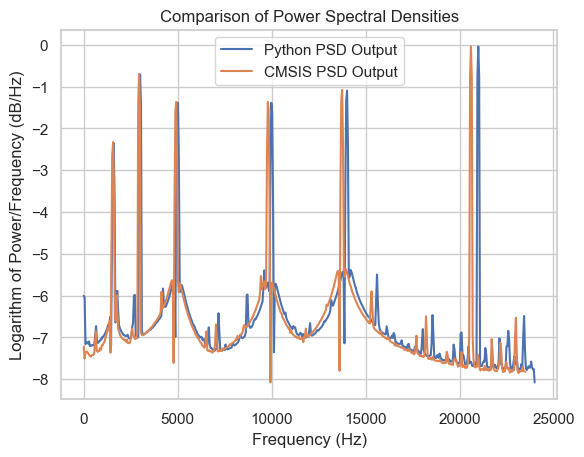

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

fs = 48000  # Sampling frequency
FFT_LENGTH = 1024  # Length of FFT

# Calculate PSD using Welch's method for the input signal
frequencies, psd = welch(inputSignal, fs=fs, nperseg=FFT_LENGTH, nfft=FFT_LENGTH, noverlap=FFT_LENGTH*0.5, window="hamming")

# Take the logarithm of the PSD values
log_psd_python = np.log10(psd)

# Load PSD data from the reference graph from the CSV file
data_cmsis = np.loadtxt('psd.csv', delimiter=' ')
frequency_cmsis = data_cmsis[:, 0]
psd_dB_cmsis = data_cmsis[:, 1]

# Normalize the PSD values of the reference graph to the same range as the input signal
min_val_input = np.min(log_psd_python)
max_val_input = np.max(log_psd_python)
min_val_cmsis = np.min(psd_dB_cmsis)
max_val_cmsis = np.max(psd_dB_cmsis)
normalized_psd_cmsis = (psd_dB_cmsis - min_val_cmsis) / (max_val_cmsis - min_val_cmsis) * (max_val_input - min_val_input) + min_val_input

# Plot both the input signal PSD and the reference graph PSD on the same graph
plt.plot(frequencies, log_psd_python, label='Python PSD Output')
plt.plot(frequency_cmsis, normalized_psd_cmsis, label='CMSIS PSD Output')
plt.title('Comparison of Power Spectral Densities (Scaled)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Logarithm of Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True)
plt.show()

